In [3]:
!pip install cmake
!pip install opencv-python
!conda install -y dlib

Channels:
 - conda-forge
Platform: linux-64
Solving environment: done

# All requested packages already installed.



In [3]:
# 필요한 패키지 import 하기
import os # 환경 변수나 디렉터리, 파일 등의 OS 자원을 제어할 수 있게 해주는 모듈
import cv2 # OpenCV라이브러리 → 컴퓨터 비전 관련 프로그래밍을 쉽게 할 수 있도록 도와주는 라이브러리
import matplotlib.pyplot as plt # 다양한 데이터를 많은 방법으로 도식화 할 수 있도록 하는 라이브러리
import numpy as np # 다차원 배열을 쉽게 처리하고 효율적으로 사용할 수 있도록 하는 라이브러리
import dlib # 이미지 처리 및 기계 학습, 얼굴인식 등을 할 수 있는 c++ 로 개발된 고성능의 라이브러리
print("🌫🛸")

🌫🛸


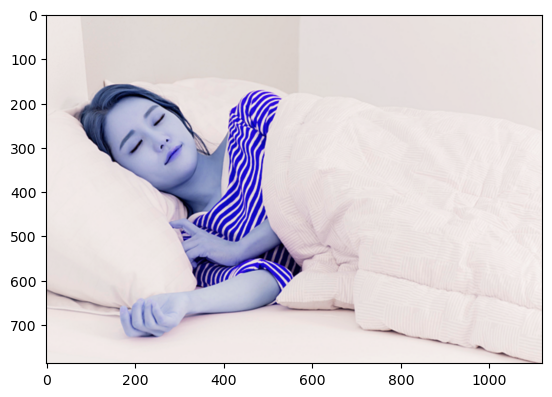

In [32]:
home_dir = os.getenv('HOME')
my_image_path = os.path.join(home_dir, 'work/camera_sticker/images/left.png') # 본인 이미지가 있는 경로를 가지고 온다.
img_bgr = cv2.imread(my_image_path)    # OpenCV로 이미지를 불러옵니다
img_show = img_bgr.copy()      # 출력용 이미지를 따로 보관합니다
plt.imshow(img_bgr) # 이미지를 출력하기 위해 출력할 이미지를 올려준다. (실제 출력은 하지 않음)
plt.show() # 이미지를 출력해준다. (실제 출력)

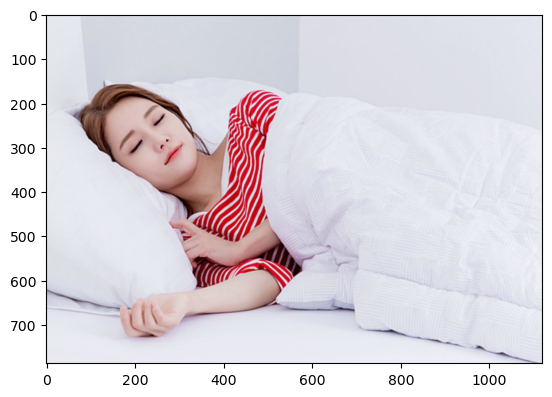

In [33]:
# plt.imshow 이전에 RGB 이미지로 바꾸는 것을 잊지마세요.
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb) # 이미지 실제 출력하기 위해 이미지를 올려줌 (원하는 사이즈의 픽셀을 원하는 색으로 채워서 만든 그림이라고 합니다.)
plt.show() # 이미지 실제 출력

In [34]:
# detector를 선언합니다
detector_hog = dlib.get_frontal_face_detector() # 기본 얼굴 감지기를 반환
print("🌫🛸")

🌫🛸


In [35]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)   # (image, num of image pyramid)
print("🌫🛸")

🌫🛸


rectangles[]


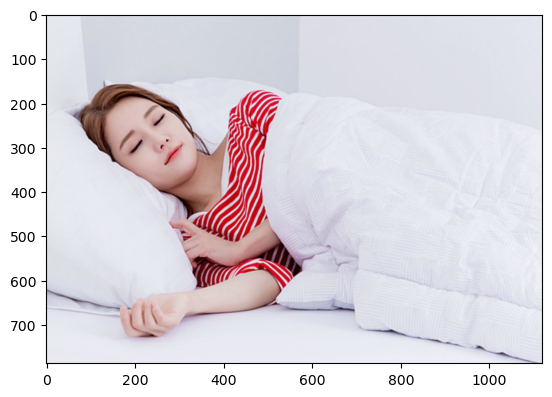

In [36]:
# 찾은 얼굴 영역 박스 리스트
# 여러 얼굴이 있을 수 있습니다
print(dlib_rects)

for dlib_rect in dlib_rects: # 찾은 얼굴 영역의 좌표
    l = dlib_rect.left() # 왼쪽
    t = dlib_rect.top() # 위쪽
    r = dlib_rect.right() # 오른쪽
    b = dlib_rect.bottom() # 아래쪽

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA) # 시작점의 좌표와 종료점 좌표로 직각 사각형을 그림

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [37]:
!wget http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
!mv shape_predictor_68_face_landmarks.dat.bz2 ~/work/camera_sticker/models
!cd ~/work/camera_sticker && bzip2 -d ./models/shape_predictor_68_face_landmarks.dat.bz2

--2025-07-28 06:47:24--  http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
Resolving dlib.net (dlib.net)... 107.180.26.78
Connecting to dlib.net (dlib.net)|107.180.26.78|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2 [following]
--2025-07-28 06:47:25--  https://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
Connecting to dlib.net (dlib.net)|107.180.26.78|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64040097 (61M)
Saving to: ‘shape_predictor_68_face_landmarks.dat.bz2’

shape_predictor_68_ 100%[===================>]  61.07M  17.1MB/s    in 4.4s    

2025-07-28 06:47:30 (13.8 MB/s) - ‘shape_predictor_68_face_landmarks.dat.bz2’ saved [64040097/64040097]

bzip2: Output file ./models/shape_predictor_68_face_landmarks.dat already exists.


In [38]:
model_path = os.path.join(home_dir, 'work/camera_sticker/models/shape_predictor_68_face_landmarks.dat')
    # 저장한 landmark 모델의 주소를 model_path 변수에 저장
landmark_predictor = dlib.shape_predictor(model_path)
    # dlib 라이브러리의 shape_predictor 함수를 이용하여 모델을 불러옴
    # landmark_predictor는 RGB이미지와 dlib.rectangle를 입력 받고 dlib.full_object_detection를 반환
    # dlib.rectangle: 내부를 예측하는 박스
    # dlib.full_object_detection: 각 구성 요소의 위치와, 이미지 상의 객체의 위치를 나타냄
print("🌫🛸")

🌫🛸


In [39]:
list_landmarks = []
    # 랜드마크의 위치를 저장할 list 생성

# 얼굴 영역 박스 마다 face landmark를 찾아냅니다
# face landmark 좌표를 저장해둡니다
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
        # 모든 landmark의 위치정보를 points 변수에 저장
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
        # 각각의 landmark 위치정보를 (x,y) 형태로 변환하여 list_points 리스트로 저장
    list_landmarks.append(list_points)
        # list_landmarks에 랜드마크 리스트를 저장

print(len(list_landmarks[0]))
    # 얼굴이 n개인 경우 list_landmarks는 n개의 원소를 갖고
    # 각 원소는 68개의 랜드마크 위치가 나열된 list
    # list_landmarks의 원소가 1개이므로 list_landmarks[1]을 호출하면 IndexError가 발생

IndexError: list index out of range

In [ ]:
"""
누워 있는 사람의 경우 ---> 14 print(len(list_landmarks[0])) 이곳에서 에러가 발생한다.
얼굴을 인식하지 못한 것으로 보인다.

"""
    

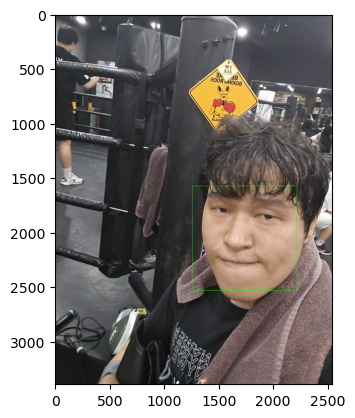

In [17]:
# list_landmarks의 원소가 1개이므로 아래 반복문은 한번만 실행됨
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)
            # cv2.circle: OpenCV의 원을 그리는 함수
            # img_show 이미지 위 각각의 point에
            # 크기가 2이고 (0, 255, 255)색으로 내부가 채워진(-1) 원을 그림
            # (마지막 인수가 자연수라면 그만큼의 두께의 선으로 원이 그려짐)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
    # RGB 이미지로 전환
plt.imshow(img_show_rgb)
    # 이미지를 준비
plt.show()
    # 이미지를 출력

In [18]:
# zip() : 두 그룹의 데이터를 서로 엮어주는 파이썬의 내장 함수
# dlib_rects와 list_landmarks 데이터를 엮어 주었음
# dlib_rects : 얼굴 영역을 저장하고 있는 값
# → rectangles[[(345, 98) (531, 284)]]
# list_landmarks : 68개의 랜드마크 값 저장(이목구비 위치(x,y))
# → [[(368, 153), (368, 174), (371, 195), (376, 215), (382, 235), (391, 252), (404, 266), (420, 277), (441, 279), (461, 276), (480, 266), (495, 252), (508, 235), (516, 216), (520, 195), (523, 173), (524, 151), (377, 131), (386, 119), (399, 116), (413, 118), (425, 124), (454, 121), (466, 114), (481, 112), (494, 114), (503, 127), (439, 143), (438, 156), (438, 169), (437, 182), (423, 197), (431, 199), (438, 200), (446, 199), (454, 197), (391, 147), (399, 142), (409, 143), (416, 149), (408, 150), (399, 150), (464, 147), (472, 141), (482, 141), (489, 145), (482, 149), (473, 149), (411, 227), (421, 222), (432, 218), (439, 220), (446, 218), (458, 222), (471, 227), (458, 234), (446, 238), (438, 238), (431, 238), (420, 235), (415, 227), (432, 227), (439, 228), (447, 227), (466, 227), (446, 228), (438, 229), (431, 228)]]

for dlib_rect, landmark in zip(dlib_rects, list_landmarks): # 얼굴 영역을 저장하고 있는 값과 68개의 랜드마크를 저장하고 있는 값으로 반복문 실행
    print (landmark[30]) # 코의 index는 30 입니다
    x = landmark[30][0] # 이미지에서 코 부위의 x값
    y = landmark[30][1] - dlib_rect.height()//2 # 이미지에서 코 부위의 y값 - 얼굴 영역의 세로를 차지하는 픽셀의 수//2 → (437, 182-(186+1//2))
    w = h = dlib_rect.width() # 얼굴 영역의 가로를 차지하는 픽셀의 수 (531-345+1) → max(x) - min(x) +1(픽셀의 수 이기 때문에 1을 더해줌 → 픽셀 수는 점 하나로도 1이 됨)
    print (f'(x,y) : ({x},{y})')
    print (f'(w,h) : ({w},{h})')

(1640, 2094)
(x,y) : (1640,1615)
(w,h) : (959,959)


(959, 959, 3)


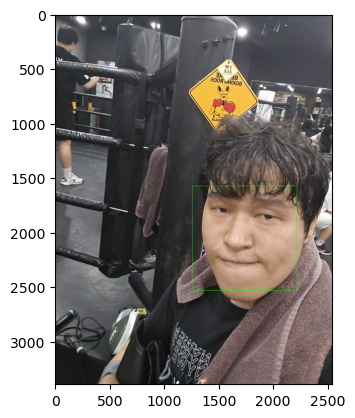

In [19]:
sticker_path = os.path.join(home_dir, 'work/camera_sticker/images/cat-whiskers.png') # 고양이 이미지의 경로
img_sticker = cv2.imread(sticker_path) # 스티커 이미지를 불러옵니다 // cv2.imread(이미지 경로) → image객체 행렬을 반환
img_sticker = cv2.resize(img_sticker, (w,h)) # 스티커 이미지 조정 → w,h는 얼굴 영역의 가로를 차지하는 픽셀의 수(187) // cv2.resize(image객체 행렬, (가로 길이, 세로 길이))
print (img_sticker.shape) # 사이즈를 조정한 왕관 이미지의 차원 확인
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

In [20]:
# x,y,w,h 모두 위에서 반복문 안에서 지정해준 값임
# x는 이미지에서 코 부위의 x값 = 437
# y는 이미지에서 코 부위의 y값 = 89
# w는 얼굴 영역의 가로를 차지하는 픽셀의 수 = 187
# h는 얼굴 영역의 가로를 차지하는 픽셀의 수 = 187
refined_x = x - w // 2 # 437 - (187//2) = 437-93 = 344
refined_y = y  # 89-187 = -98
# 원본 이미지에 스티커 이미지를 추가하기 위해서 x, y 좌표를 조정합니다. 이미지 시작점은 top-left 좌표이기 때문입니다.
# 즉, refined_x, refined_y값에서 왕관 이미지가 시작됨
print (f'(x,y) : ({refined_x},{refined_y})') # 음수 발생 : 이미지 범위를 벗어남
# 우리는 현재 이마 자리에 왕관을 두고 싶은건데, 이마위치 - 왕관 높이를 했더니 이미지의 범위를 초과하여 음수가 나오는 것
# opencv는 ndarray데이터를 사용하는데, ndarray는 음수인덱스에 접근 불가하므로 스티커 이미지를 잘라 줘야 한다.

(x,y) : (1161,1615)


In [21]:
# 왕관 이미지가 이미지 밖에서 시작하지 않도록 조정이 필요함
# 좌표 순서가 y,x임에 유의한다. (y,x,rgb channel)
# 현재 상황에서는 -y 크기만큼 스티커를 crop 하고, top 의 x좌표와 y 좌표를 각각의 경우에 맞춰 원본 이미지의 경계 값으로 수정하면 아래와 같은 형식으로 나옵니다.
# 음수값 만큼 왕관 이미지(혹은 추후 적용할 스티커 이미지)를 자른다.
if refined_x < 0:
    img_sticker = img_sticker[:, -refined_x:]
    refined_x = 0
# 왕관 이미지를 씌우기 위해 왕관 이미지가 시작할 y좌표 값 조정
if refined_y < 0:
    img_sticker = img_sticker[-refined_y:, :] # refined_y가 -98이므로, img_sticker[98: , :]가 된다. (187, 187, 3)에서 (89, 187, 3)이 됨 (187개 중에서 98개가 잘려나감)
    refined_y = 0

print (f'(x,y) : ({refined_x},{refined_y})')

(x,y) : (1161,1615)


In [24]:
# sticker_area는 원본이미지에서 스티커를 적용할 위치를 crop한 이미지 입니다.
# 예제에서는 (344,0) 부터 (344+187, 0+89) 범위의 이미지를 의미합니다.
# 좌표 순서가 y,x임에 유의한다. (y,x,rgb channel)
# img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
# img_show[0:0+89, 344:344+187]
# img_show[0:89, 344:531]
# 즉, x좌표는 344~531 / y좌표는 0~89가 됨
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
# 왕관 이미지에서 사용할 부분은 0이 아닌 색이 있는 부분을 사용합니다.
# 왕관 이미지에서 0이 나오는 부분은 흰색이라는 뜻, 즉 이미지가 없다는 소리임.
# 현재 왕관 이미지에서는 왕관과 받침대 밑의 ------ 부분이 됨
# 그렇기 때문에 0인 부분(이미지가 없는 부분)은 제외하고 적용
# sticker_area는 원본 이미지에서 스티커를 적용할 위치를 미리 잘라낸 이미지입니다.
# 즉, 왕관 이미지에서 왕관 이미지가 없는 부분(왕관과 받침대 밑의 ------ 부분)은 원본 이|미지에서 미리 잘라놓은 sticker_area(스티커 적용할 부분 만큼 원본 이미지에서 자른 이미지)를 적용하고,
# 나머지 부분은 스티커로 채워주면 됨
# np.where는 조건에 해당하는 인덱스만 찾아서 값을 적용하는 방법이다.
# 아래 코드에서는 img_sticker가 0일 경우(왕관 이미지에서 왕관 부분 제외한 나머지 이미지)에는 sticker_area(원본 이미지에서 스티커를 적용할 위치를 미리 잘라낸 이미지)를 적용하고,
# 나머지 부분은 img_sticker(왕관 이미지)를 적용한다.
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker,sticker_area,img_sticker).astype(np.uint8)
print("슝~")

슝~


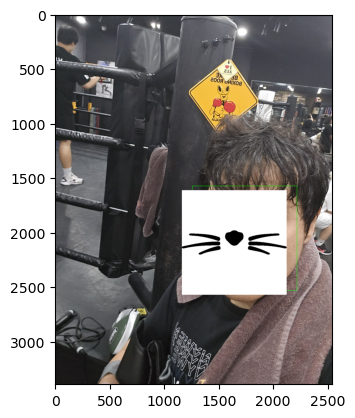

In [25]:
# 왕관 이미지를 적용한 이미지를 보여준다.
# 얼굴 영역(7-3)과 랜드마크(7-4)를 미리 적용해놓은 img_show에 왕관 이미지를 덧붙인 이미지가 나오게 된다.)
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

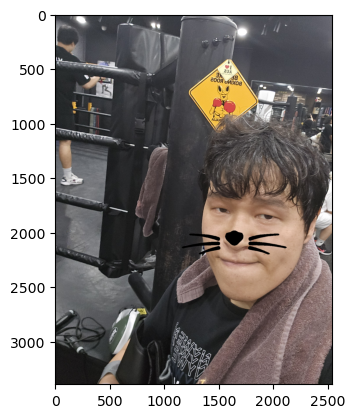

In [26]:
# 위에서 설명했으므로 생략
# 왕관 이미지
sticker_area = img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
# img_bgr은 7-2에서 rgb로만 적용해놓은 원본 이미지이다.
img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker,sticker_area,img_sticker).astype(np.uint8) # img_sticker==0 일 경우에 배경과 Sticker가 반대로 지워지는 경우가 있어 바꿈
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)) # rgb만 적용해놓은 원본 이미지에 왕관 이미지를 덮어 씌운 이미지가 나오게 된다.
plt.show()

🌫🛸
🌫🛸
rectangles[[(171, 295) (726, 850)]]
68
(468, 562)
(x,y) : (468,284)
(w,h) : (556,556)
(556, 556, 3)
(x,y) : (190,284)
(x,y) : (190,284)


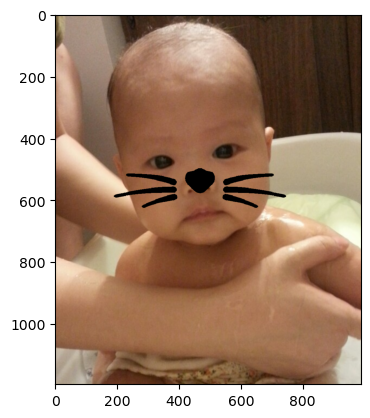

In [40]:
home_dir = os.getenv('HOME')
my_image_path = os.path.join(home_dir, 'work/camera_sticker/images/baby.png') # 본인 이미지가 있는 경로를 가지고 온다.
img_bgr = cv2.imread(my_image_path)    # OpenCV로 이미지를 불러옵니다
img_show = img_bgr.copy()      # 출력용 이미지를 따로 보관합니다
# detector를 선언합니다
detector_hog = dlib.get_frontal_face_detector() # 기본 얼굴 감지기를 반환
print("🌫🛸")
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)   # (image, num of image pyramid)
print("🌫🛸")
# 찾은 얼굴 영역 박스 리스트
# 여러 얼굴이 있을 수 있습니다
print(dlib_rects)

for dlib_rect in dlib_rects: # 찾은 얼굴 영역의 좌표
    l = dlib_rect.left() # 왼쪽
    t = dlib_rect.top() # 위쪽
    r = dlib_rect.right() # 오른쪽
    b = dlib_rect.bottom() # 아래쪽

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA) # 시작점의 좌표와 종료점 좌표로 직각 사각형을 그림
    
list_landmarks = []
    # 랜드마크의 위치를 저장할 list 생성

# 얼굴 영역 박스 마다 face landmark를 찾아냅니다
# face landmark 좌표를 저장해둡니다
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
        # 모든 landmark의 위치정보를 points 변수에 저장
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
        # 각각의 landmark 위치정보를 (x,y) 형태로 변환하여 list_points 리스트로 저장
    list_landmarks.append(list_points)
        # list_landmarks에 랜드마크 리스트를 저장

print(len(list_landmarks[0]))
    # 얼굴이 n개인 경우 list_landmarks는 n개의 원소를 갖고
    # 각 원소는 68개의 랜드마크 위치가 나열된 list
    # list_landmarks의 원소가 1개이므로 list_landmarks[1]을 호출하면 IndexError가 발생

# list_landmarks의 원소가 1개이므로 아래 반복문은 한번만 실행됨
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)
            # cv2.circle: OpenCV의 원을 그리는 함수
            # img_show 이미지 위 각각의 point에
            # 크기가 2이고 (0, 255, 255)색으로 내부가 채워진(-1) 원을 그림
            # (마지막 인수가 자연수라면 그만큼의 두께의 선으로 원이 그려짐)

# zip() : 두 그룹의 데이터를 서로 엮어주는 파이썬의 내장 함수
# dlib_rects와 list_landmarks 데이터를 엮어 주었음
# dlib_rects : 얼굴 영역을 저장하고 있는 값
# → rectangles[[(345, 98) (531, 284)]]
# list_landmarks : 68개의 랜드마크 값 저장(이목구비 위치(x,y))
# → [[(368, 153), (368, 174), (371, 195), (376, 215), (382, 235), (391, 252), (404, 266), (420, 277), (441, 279), (461, 276), (480, 266), (495, 252), (508, 235), (516, 216), (520, 195), (523, 173), (524, 151), (377, 131), (386, 119), (399, 116), (413, 118), (425, 124), (454, 121), (466, 114), (481, 112), (494, 114), (503, 127), (439, 143), (438, 156), (438, 169), (437, 182), (423, 197), (431, 199), (438, 200), (446, 199), (454, 197), (391, 147), (399, 142), (409, 143), (416, 149), (408, 150), (399, 150), (464, 147), (472, 141), (482, 141), (489, 145), (482, 149), (473, 149), (411, 227), (421, 222), (432, 218), (439, 220), (446, 218), (458, 222), (471, 227), (458, 234), (446, 238), (438, 238), (431, 238), (420, 235), (415, 227), (432, 227), (439, 228), (447, 227), (466, 227), (446, 228), (438, 229), (431, 228)]]

for dlib_rect, landmark in zip(dlib_rects, list_landmarks): # 얼굴 영역을 저장하고 있는 값과 68개의 랜드마크를 저장하고 있는 값으로 반복문 실행
    print (landmark[30]) # 코의 index는 30 입니다
    x = landmark[30][0] # 이미지에서 코 부위의 x값
    y = landmark[30][1] - dlib_rect.height()//2 # 이미지에서 코 부위의 y값 - 얼굴 영역의 세로를 차지하는 픽셀의 수//2 → (437, 182-(186+1//2))
    w = h = dlib_rect.width() # 얼굴 영역의 가로를 차지하는 픽셀의 수 (531-345+1) → max(x) - min(x) +1(픽셀의 수 이기 때문에 1을 더해줌 → 픽셀 수는 점 하나로도 1이 됨)
    print (f'(x,y) : ({x},{y})')
    print (f'(w,h) : ({w},{h})')
    
sticker_path = os.path.join(home_dir, 'work/camera_sticker/images/cat-whiskers.png') # 고양이 이미지의 경로
img_sticker = cv2.imread(sticker_path) # 스티커 이미지를 불러옵니다 // cv2.imread(이미지 경로) → image객체 행렬을 반환
img_sticker = cv2.resize(img_sticker, (w,h)) # 스티커 이미지 조정 → w,h는 얼굴 영역의 가로를 차지하는 픽셀의 수(187) // cv2.resize(image객체 행렬, (가로 길이, 세로 길이))
print (img_sticker.shape) # 사이즈를 조정한 왕관 이미지의 차원 확인

# x,y,w,h 모두 위에서 반복문 안에서 지정해준 값임
# x는 이미지에서 코 부위의 x값 = 437
# y는 이미지에서 코 부위의 y값 = 89
# w는 얼굴 영역의 가로를 차지하는 픽셀의 수 = 187
# h는 얼굴 영역의 가로를 차지하는 픽셀의 수 = 187
refined_x = x - w // 2 # 437 - (187//2) = 437-93 = 344
refined_y = y  # 89-187 = -98
# 원본 이미지에 스티커 이미지를 추가하기 위해서 x, y 좌표를 조정합니다. 이미지 시작점은 top-left 좌표이기 때문입니다.
# 즉, refined_x, refined_y값에서 왕관 이미지가 시작됨
print (f'(x,y) : ({refined_x},{refined_y})') # 음수 발생 : 이미지 범위를 벗어남
# 우리는 현재 이마 자리에 왕관을 두고 싶은건데, 이마위치 - 왕관 높이를 했더니 이미지의 범위를 초과하여 음수가 나오는 것
# opencv는 ndarray데이터를 사용하는데, ndarray는 음수인덱스에 접근 불가하므로 스티커 이미지를 잘라 줘야 한다.

# 왕관 이미지가 이미지 밖에서 시작하지 않도록 조정이 필요함
# 좌표 순서가 y,x임에 유의한다. (y,x,rgb channel)
# 현재 상황에서는 -y 크기만큼 스티커를 crop 하고, top 의 x좌표와 y 좌표를 각각의 경우에 맞춰 원본 이미지의 경계 값으로 수정하면 아래와 같은 형식으로 나옵니다.
# 음수값 만큼 왕관 이미지(혹은 추후 적용할 스티커 이미지)를 자른다.
if refined_x < 0:
    img_sticker = img_sticker[:, -refined_x:]
    refined_x = 0
# 왕관 이미지를 씌우기 위해 왕관 이미지가 시작할 y좌표 값 조정
if refined_y < 0:
    img_sticker = img_sticker[-refined_y:, :] # refined_y가 -98이므로, img_sticker[98: , :]가 된다. (187, 187, 3)에서 (89, 187, 3)이 됨 (187개 중에서 98개가 잘려나감)
    refined_y = 0

print (f'(x,y) : ({refined_x},{refined_y})')

# sticker_area는 원본이미지에서 스티커를 적용할 위치를 crop한 이미지 입니다.
# 예제에서는 (344,0) 부터 (344+187, 0+89) 범위의 이미지를 의미합니다.
# 좌표 순서가 y,x임에 유의한다. (y,x,rgb channel)
# img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
# img_show[0:0+89, 344:344+187]
# img_show[0:89, 344:531]
# 즉, x좌표는 344~531 / y좌표는 0~89가 됨
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
# 왕관 이미지에서 사용할 부분은 0이 아닌 색이 있는 부분을 사용합니다.
# 왕관 이미지에서 0이 나오는 부분은 흰색이라는 뜻, 즉 이미지가 없다는 소리임.
# 현재 왕관 이미지에서는 왕관과 받침대 밑의 ------ 부분이 됨
# 그렇기 때문에 0인 부분(이미지가 없는 부분)은 제외하고 적용
# sticker_area는 원본 이미지에서 스티커를 적용할 위치를 미리 잘라낸 이미지입니다.
# 즉, 왕관 이미지에서 왕관 이미지가 없는 부분(왕관과 받침대 밑의 ------ 부분)은 원본 이|미지에서 미리 잘라놓은 sticker_area(스티커 적용할 부분 만큼 원본 이미지에서 자른 이미지)를 적용하고,
# 나머지 부분은 스티커로 채워주면 됨
# np.where는 조건에 해당하는 인덱스만 찾아서 값을 적용하는 방법이다.
# 아래 코드에서는 img_sticker가 0일 경우(왕관 이미지에서 왕관 부분 제외한 나머지 이미지)에는 sticker_area(원본 이미지에서 스티커를 적용할 위치를 미리 잘라낸 이미지)를 적용하고,
# 나머지 부분은 img_sticker(왕관 이미지)를 적용한다.
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker,sticker_area,img_sticker).astype(np.uint8)

# 위에서 설명했으므로 생략
# 왕관 이미지
sticker_area = img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
# img_bgr은 7-2에서 rgb로만 적용해놓은 원본 이미지이다.
img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker,sticker_area,img_sticker).astype(np.uint8) # img_sticker==0 일 경우에 배경과 Sticker가 반대로 지워지는 경우가 있어 바꿈
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)) # rgb만 적용해놓은 원본 이미지에 왕관 이미지를 덮어 씌운 이미지가 나오게 된다.
plt.show()

In [ ]:
"""
고개가 기울어지면 그 각도에 맞춰서 수염도 함께 기울어 저야 하는데 그렇지 못하다.


"""

🌫🛸
🌫🛸
rectangles[[(325, 325) (454, 454)], [(798, 368) (927, 497)]]
68
(404, 398)
(x,y) : (404,333)
(w,h) : (130,130)
(852, 431)
(x,y) : (852,366)
(w,h) : (130,130)
(130, 130, 3)
(x,y) : (787,366)
(x,y) : (787,366)


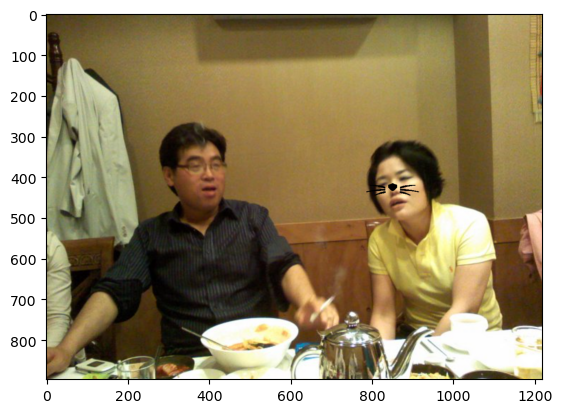

In [41]:
home_dir = os.getenv('HOME')
my_image_path = os.path.join(home_dir, 'work/camera_sticker/images/2pip.png') # 본인 이미지가 있는 경로를 가지고 온다.
img_bgr = cv2.imread(my_image_path)    # OpenCV로 이미지를 불러옵니다
img_show = img_bgr.copy()      # 출력용 이미지를 따로 보관합니다
# detector를 선언합니다
detector_hog = dlib.get_frontal_face_detector() # 기본 얼굴 감지기를 반환
print("🌫🛸")
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)   # (image, num of image pyramid)
print("🌫🛸")
# 찾은 얼굴 영역 박스 리스트
# 여러 얼굴이 있을 수 있습니다
print(dlib_rects)

for dlib_rect in dlib_rects: # 찾은 얼굴 영역의 좌표
    l = dlib_rect.left() # 왼쪽
    t = dlib_rect.top() # 위쪽
    r = dlib_rect.right() # 오른쪽
    b = dlib_rect.bottom() # 아래쪽

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA) # 시작점의 좌표와 종료점 좌표로 직각 사각형을 그림
    
list_landmarks = []
    # 랜드마크의 위치를 저장할 list 생성

# 얼굴 영역 박스 마다 face landmark를 찾아냅니다
# face landmark 좌표를 저장해둡니다
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
        # 모든 landmark의 위치정보를 points 변수에 저장
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
        # 각각의 landmark 위치정보를 (x,y) 형태로 변환하여 list_points 리스트로 저장
    list_landmarks.append(list_points)
        # list_landmarks에 랜드마크 리스트를 저장

print(len(list_landmarks[0]))
    # 얼굴이 n개인 경우 list_landmarks는 n개의 원소를 갖고
    # 각 원소는 68개의 랜드마크 위치가 나열된 list
    # list_landmarks의 원소가 1개이므로 list_landmarks[1]을 호출하면 IndexError가 발생

# list_landmarks의 원소가 1개이므로 아래 반복문은 한번만 실행됨
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)
            # cv2.circle: OpenCV의 원을 그리는 함수
            # img_show 이미지 위 각각의 point에
            # 크기가 2이고 (0, 255, 255)색으로 내부가 채워진(-1) 원을 그림
            # (마지막 인수가 자연수라면 그만큼의 두께의 선으로 원이 그려짐)

# zip() : 두 그룹의 데이터를 서로 엮어주는 파이썬의 내장 함수
# dlib_rects와 list_landmarks 데이터를 엮어 주었음
# dlib_rects : 얼굴 영역을 저장하고 있는 값
# → rectangles[[(345, 98) (531, 284)]]
# list_landmarks : 68개의 랜드마크 값 저장(이목구비 위치(x,y))
# → [[(368, 153), (368, 174), (371, 195), (376, 215), (382, 235), (391, 252), (404, 266), (420, 277), (441, 279), (461, 276), (480, 266), (495, 252), (508, 235), (516, 216), (520, 195), (523, 173), (524, 151), (377, 131), (386, 119), (399, 116), (413, 118), (425, 124), (454, 121), (466, 114), (481, 112), (494, 114), (503, 127), (439, 143), (438, 156), (438, 169), (437, 182), (423, 197), (431, 199), (438, 200), (446, 199), (454, 197), (391, 147), (399, 142), (409, 143), (416, 149), (408, 150), (399, 150), (464, 147), (472, 141), (482, 141), (489, 145), (482, 149), (473, 149), (411, 227), (421, 222), (432, 218), (439, 220), (446, 218), (458, 222), (471, 227), (458, 234), (446, 238), (438, 238), (431, 238), (420, 235), (415, 227), (432, 227), (439, 228), (447, 227), (466, 227), (446, 228), (438, 229), (431, 228)]]

for dlib_rect, landmark in zip(dlib_rects, list_landmarks): # 얼굴 영역을 저장하고 있는 값과 68개의 랜드마크를 저장하고 있는 값으로 반복문 실행
    print (landmark[30]) # 코의 index는 30 입니다
    x = landmark[30][0] # 이미지에서 코 부위의 x값
    y = landmark[30][1] - dlib_rect.height()//2 # 이미지에서 코 부위의 y값 - 얼굴 영역의 세로를 차지하는 픽셀의 수//2 → (437, 182-(186+1//2))
    w = h = dlib_rect.width() # 얼굴 영역의 가로를 차지하는 픽셀의 수 (531-345+1) → max(x) - min(x) +1(픽셀의 수 이기 때문에 1을 더해줌 → 픽셀 수는 점 하나로도 1이 됨)
    print (f'(x,y) : ({x},{y})')
    print (f'(w,h) : ({w},{h})')
    
sticker_path = os.path.join(home_dir, 'work/camera_sticker/images/cat-whiskers.png') # 고양이 이미지의 경로
img_sticker = cv2.imread(sticker_path) # 스티커 이미지를 불러옵니다 // cv2.imread(이미지 경로) → image객체 행렬을 반환
img_sticker = cv2.resize(img_sticker, (w,h)) # 스티커 이미지 조정 → w,h는 얼굴 영역의 가로를 차지하는 픽셀의 수(187) // cv2.resize(image객체 행렬, (가로 길이, 세로 길이))
print (img_sticker.shape) # 사이즈를 조정한 왕관 이미지의 차원 확인

# x,y,w,h 모두 위에서 반복문 안에서 지정해준 값임
# x는 이미지에서 코 부위의 x값 = 437
# y는 이미지에서 코 부위의 y값 = 89
# w는 얼굴 영역의 가로를 차지하는 픽셀의 수 = 187
# h는 얼굴 영역의 가로를 차지하는 픽셀의 수 = 187
refined_x = x - w // 2 # 437 - (187//2) = 437-93 = 344
refined_y = y  # 89-187 = -98
# 원본 이미지에 스티커 이미지를 추가하기 위해서 x, y 좌표를 조정합니다. 이미지 시작점은 top-left 좌표이기 때문입니다.
# 즉, refined_x, refined_y값에서 왕관 이미지가 시작됨
print (f'(x,y) : ({refined_x},{refined_y})') # 음수 발생 : 이미지 범위를 벗어남
# 우리는 현재 이마 자리에 왕관을 두고 싶은건데, 이마위치 - 왕관 높이를 했더니 이미지의 범위를 초과하여 음수가 나오는 것
# opencv는 ndarray데이터를 사용하는데, ndarray는 음수인덱스에 접근 불가하므로 스티커 이미지를 잘라 줘야 한다.

# 왕관 이미지가 이미지 밖에서 시작하지 않도록 조정이 필요함
# 좌표 순서가 y,x임에 유의한다. (y,x,rgb channel)
# 현재 상황에서는 -y 크기만큼 스티커를 crop 하고, top 의 x좌표와 y 좌표를 각각의 경우에 맞춰 원본 이미지의 경계 값으로 수정하면 아래와 같은 형식으로 나옵니다.
# 음수값 만큼 왕관 이미지(혹은 추후 적용할 스티커 이미지)를 자른다.
if refined_x < 0:
    img_sticker = img_sticker[:, -refined_x:]
    refined_x = 0
# 왕관 이미지를 씌우기 위해 왕관 이미지가 시작할 y좌표 값 조정
if refined_y < 0:
    img_sticker = img_sticker[-refined_y:, :] # refined_y가 -98이므로, img_sticker[98: , :]가 된다. (187, 187, 3)에서 (89, 187, 3)이 됨 (187개 중에서 98개가 잘려나감)
    refined_y = 0

print (f'(x,y) : ({refined_x},{refined_y})')

# sticker_area는 원본이미지에서 스티커를 적용할 위치를 crop한 이미지 입니다.
# 예제에서는 (344,0) 부터 (344+187, 0+89) 범위의 이미지를 의미합니다.
# 좌표 순서가 y,x임에 유의한다. (y,x,rgb channel)
# img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
# img_show[0:0+89, 344:344+187]
# img_show[0:89, 344:531]
# 즉, x좌표는 344~531 / y좌표는 0~89가 됨
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
# 왕관 이미지에서 사용할 부분은 0이 아닌 색이 있는 부분을 사용합니다.
# 왕관 이미지에서 0이 나오는 부분은 흰색이라는 뜻, 즉 이미지가 없다는 소리임.
# 현재 왕관 이미지에서는 왕관과 받침대 밑의 ------ 부분이 됨
# 그렇기 때문에 0인 부분(이미지가 없는 부분)은 제외하고 적용
# sticker_area는 원본 이미지에서 스티커를 적용할 위치를 미리 잘라낸 이미지입니다.
# 즉, 왕관 이미지에서 왕관 이미지가 없는 부분(왕관과 받침대 밑의 ------ 부분)은 원본 이|미지에서 미리 잘라놓은 sticker_area(스티커 적용할 부분 만큼 원본 이미지에서 자른 이미지)를 적용하고,
# 나머지 부분은 스티커로 채워주면 됨
# np.where는 조건에 해당하는 인덱스만 찾아서 값을 적용하는 방법이다.
# 아래 코드에서는 img_sticker가 0일 경우(왕관 이미지에서 왕관 부분 제외한 나머지 이미지)에는 sticker_area(원본 이미지에서 스티커를 적용할 위치를 미리 잘라낸 이미지)를 적용하고,
# 나머지 부분은 img_sticker(왕관 이미지)를 적용한다.
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker,sticker_area,img_sticker).astype(np.uint8)

# 위에서 설명했으므로 생략
# 왕관 이미지
sticker_area = img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
# img_bgr은 7-2에서 rgb로만 적용해놓은 원본 이미지이다.
img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker,sticker_area,img_sticker).astype(np.uint8) # img_sticker==0 일 경우에 배경과 Sticker가 반대로 지워지는 경우가 있어 바꿈
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)) # rgb만 적용해놓은 원본 이미지에 왕관 이미지를 덮어 씌운 이미지가 나오게 된다.
plt.show()

In [ ]:
#  두사람을 감지 하지 못한 것인가? 아님 안경쓴사람을 못찾았나?
    

🌫🛸
🌫🛸
rectangles[[(325, 325) (454, 454)]]
68
(404, 398)
(x,y) : (404,333)
(w,h) : (130,130)
(130, 130, 3)
(x,y) : (339,333)
(x,y) : (339,333)


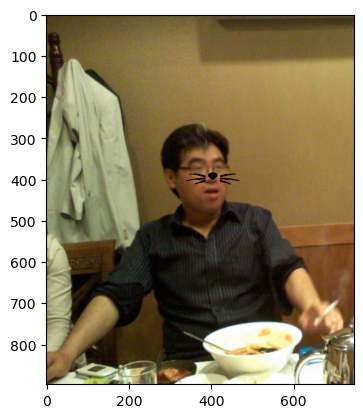

In [42]:
home_dir = os.getenv('HOME')
my_image_path = os.path.join(home_dir, 'work/camera_sticker/images/1pip.png') # 본인 이미지가 있는 경로를 가지고 온다.
img_bgr = cv2.imread(my_image_path)    # OpenCV로 이미지를 불러옵니다
img_show = img_bgr.copy()      # 출력용 이미지를 따로 보관합니다
# detector를 선언합니다
detector_hog = dlib.get_frontal_face_detector() # 기본 얼굴 감지기를 반환
print("🌫🛸")
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)   # (image, num of image pyramid)
print("🌫🛸")
# 찾은 얼굴 영역 박스 리스트
# 여러 얼굴이 있을 수 있습니다
print(dlib_rects)

for dlib_rect in dlib_rects: # 찾은 얼굴 영역의 좌표
    l = dlib_rect.left() # 왼쪽
    t = dlib_rect.top() # 위쪽
    r = dlib_rect.right() # 오른쪽
    b = dlib_rect.bottom() # 아래쪽

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA) # 시작점의 좌표와 종료점 좌표로 직각 사각형을 그림
    
list_landmarks = []
    # 랜드마크의 위치를 저장할 list 생성

# 얼굴 영역 박스 마다 face landmark를 찾아냅니다
# face landmark 좌표를 저장해둡니다
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
        # 모든 landmark의 위치정보를 points 변수에 저장
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
        # 각각의 landmark 위치정보를 (x,y) 형태로 변환하여 list_points 리스트로 저장
    list_landmarks.append(list_points)
        # list_landmarks에 랜드마크 리스트를 저장

print(len(list_landmarks[0]))
    # 얼굴이 n개인 경우 list_landmarks는 n개의 원소를 갖고
    # 각 원소는 68개의 랜드마크 위치가 나열된 list
    # list_landmarks의 원소가 1개이므로 list_landmarks[1]을 호출하면 IndexError가 발생

# list_landmarks의 원소가 1개이므로 아래 반복문은 한번만 실행됨
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)
            # cv2.circle: OpenCV의 원을 그리는 함수
            # img_show 이미지 위 각각의 point에
            # 크기가 2이고 (0, 255, 255)색으로 내부가 채워진(-1) 원을 그림
            # (마지막 인수가 자연수라면 그만큼의 두께의 선으로 원이 그려짐)

# zip() : 두 그룹의 데이터를 서로 엮어주는 파이썬의 내장 함수
# dlib_rects와 list_landmarks 데이터를 엮어 주었음
# dlib_rects : 얼굴 영역을 저장하고 있는 값
# → rectangles[[(345, 98) (531, 284)]]
# list_landmarks : 68개의 랜드마크 값 저장(이목구비 위치(x,y))
# → [[(368, 153), (368, 174), (371, 195), (376, 215), (382, 235), (391, 252), (404, 266), (420, 277), (441, 279), (461, 276), (480, 266), (495, 252), (508, 235), (516, 216), (520, 195), (523, 173), (524, 151), (377, 131), (386, 119), (399, 116), (413, 118), (425, 124), (454, 121), (466, 114), (481, 112), (494, 114), (503, 127), (439, 143), (438, 156), (438, 169), (437, 182), (423, 197), (431, 199), (438, 200), (446, 199), (454, 197), (391, 147), (399, 142), (409, 143), (416, 149), (408, 150), (399, 150), (464, 147), (472, 141), (482, 141), (489, 145), (482, 149), (473, 149), (411, 227), (421, 222), (432, 218), (439, 220), (446, 218), (458, 222), (471, 227), (458, 234), (446, 238), (438, 238), (431, 238), (420, 235), (415, 227), (432, 227), (439, 228), (447, 227), (466, 227), (446, 228), (438, 229), (431, 228)]]

for dlib_rect, landmark in zip(dlib_rects, list_landmarks): # 얼굴 영역을 저장하고 있는 값과 68개의 랜드마크를 저장하고 있는 값으로 반복문 실행
    print (landmark[30]) # 코의 index는 30 입니다
    x = landmark[30][0] # 이미지에서 코 부위의 x값
    y = landmark[30][1] - dlib_rect.height()//2 # 이미지에서 코 부위의 y값 - 얼굴 영역의 세로를 차지하는 픽셀의 수//2 → (437, 182-(186+1//2))
    w = h = dlib_rect.width() # 얼굴 영역의 가로를 차지하는 픽셀의 수 (531-345+1) → max(x) - min(x) +1(픽셀의 수 이기 때문에 1을 더해줌 → 픽셀 수는 점 하나로도 1이 됨)
    print (f'(x,y) : ({x},{y})')
    print (f'(w,h) : ({w},{h})')
    
sticker_path = os.path.join(home_dir, 'work/camera_sticker/images/cat-whiskers.png') # 고양이 이미지의 경로
img_sticker = cv2.imread(sticker_path) # 스티커 이미지를 불러옵니다 // cv2.imread(이미지 경로) → image객체 행렬을 반환
img_sticker = cv2.resize(img_sticker, (w,h)) # 스티커 이미지 조정 → w,h는 얼굴 영역의 가로를 차지하는 픽셀의 수(187) // cv2.resize(image객체 행렬, (가로 길이, 세로 길이))
print (img_sticker.shape) # 사이즈를 조정한 왕관 이미지의 차원 확인

# x,y,w,h 모두 위에서 반복문 안에서 지정해준 값임
# x는 이미지에서 코 부위의 x값 = 437
# y는 이미지에서 코 부위의 y값 = 89
# w는 얼굴 영역의 가로를 차지하는 픽셀의 수 = 187
# h는 얼굴 영역의 가로를 차지하는 픽셀의 수 = 187
refined_x = x - w // 2 # 437 - (187//2) = 437-93 = 344
refined_y = y  # 89-187 = -98
# 원본 이미지에 스티커 이미지를 추가하기 위해서 x, y 좌표를 조정합니다. 이미지 시작점은 top-left 좌표이기 때문입니다.
# 즉, refined_x, refined_y값에서 왕관 이미지가 시작됨
print (f'(x,y) : ({refined_x},{refined_y})') # 음수 발생 : 이미지 범위를 벗어남
# 우리는 현재 이마 자리에 왕관을 두고 싶은건데, 이마위치 - 왕관 높이를 했더니 이미지의 범위를 초과하여 음수가 나오는 것
# opencv는 ndarray데이터를 사용하는데, ndarray는 음수인덱스에 접근 불가하므로 스티커 이미지를 잘라 줘야 한다.

# 왕관 이미지가 이미지 밖에서 시작하지 않도록 조정이 필요함
# 좌표 순서가 y,x임에 유의한다. (y,x,rgb channel)
# 현재 상황에서는 -y 크기만큼 스티커를 crop 하고, top 의 x좌표와 y 좌표를 각각의 경우에 맞춰 원본 이미지의 경계 값으로 수정하면 아래와 같은 형식으로 나옵니다.
# 음수값 만큼 왕관 이미지(혹은 추후 적용할 스티커 이미지)를 자른다.
if refined_x < 0:
    img_sticker = img_sticker[:, -refined_x:]
    refined_x = 0
# 왕관 이미지를 씌우기 위해 왕관 이미지가 시작할 y좌표 값 조정
if refined_y < 0:
    img_sticker = img_sticker[-refined_y:, :] # refined_y가 -98이므로, img_sticker[98: , :]가 된다. (187, 187, 3)에서 (89, 187, 3)이 됨 (187개 중에서 98개가 잘려나감)
    refined_y = 0

print (f'(x,y) : ({refined_x},{refined_y})')

# sticker_area는 원본이미지에서 스티커를 적용할 위치를 crop한 이미지 입니다.
# 예제에서는 (344,0) 부터 (344+187, 0+89) 범위의 이미지를 의미합니다.
# 좌표 순서가 y,x임에 유의한다. (y,x,rgb channel)
# img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
# img_show[0:0+89, 344:344+187]
# img_show[0:89, 344:531]
# 즉, x좌표는 344~531 / y좌표는 0~89가 됨
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
# 왕관 이미지에서 사용할 부분은 0이 아닌 색이 있는 부분을 사용합니다.
# 왕관 이미지에서 0이 나오는 부분은 흰색이라는 뜻, 즉 이미지가 없다는 소리임.
# 현재 왕관 이미지에서는 왕관과 받침대 밑의 ------ 부분이 됨
# 그렇기 때문에 0인 부분(이미지가 없는 부분)은 제외하고 적용
# sticker_area는 원본 이미지에서 스티커를 적용할 위치를 미리 잘라낸 이미지입니다.
# 즉, 왕관 이미지에서 왕관 이미지가 없는 부분(왕관과 받침대 밑의 ------ 부분)은 원본 이|미지에서 미리 잘라놓은 sticker_area(스티커 적용할 부분 만큼 원본 이미지에서 자른 이미지)를 적용하고,
# 나머지 부분은 스티커로 채워주면 됨
# np.where는 조건에 해당하는 인덱스만 찾아서 값을 적용하는 방법이다.
# 아래 코드에서는 img_sticker가 0일 경우(왕관 이미지에서 왕관 부분 제외한 나머지 이미지)에는 sticker_area(원본 이미지에서 스티커를 적용할 위치를 미리 잘라낸 이미지)를 적용하고,
# 나머지 부분은 img_sticker(왕관 이미지)를 적용한다.
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker,sticker_area,img_sticker).astype(np.uint8)

# 위에서 설명했으므로 생략
# 왕관 이미지
sticker_area = img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
# img_bgr은 7-2에서 rgb로만 적용해놓은 원본 이미지이다.
img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker,sticker_area,img_sticker).astype(np.uint8) # img_sticker==0 일 경우에 배경과 Sticker가 반대로 지워지는 경우가 있어 바꿈
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)) # rgb만 적용해놓은 원본 이미지에 왕관 이미지를 덮어 씌운 이미지가 나오게 된다.
plt.show()

In [ ]:
# 2명은 찾지 못한다.
# 확인 결과 제대로 2명의 얼굴은 찾았지만 스티커를 2개 붙이지 못하는 것이다.
# 2명을 붙이려면 어떻게 해야할까? 
# 1. 얼굴을 인식 하는 알고리즘에서 1개의 얼굴을 찾으면 더 진행 안하고 스티커 붙이기를 진행한다.
# 2. 다음 얼굴을 인식하고 2번째 얼굴을 찾으면 다시 스티커 붙이기를 진행한다.
# 3. 다음 얼굴을 찾아보고 없으면 종료한다.
# 위 과정을 루프를 통해서 구현해야 한다.

In [22]:
import os
import dlib
import cv2
import numpy as np
import matplotlib.pyplot as plt # plt 사용을 위해 import 추가

home_dir = os.getenv('HOME')
my_image_path = os.path.join(home_dir, 'work/camera_sticker/images/2pip.png') # 본인 이미지가 있는 경로를 가지고 온다.
img_bgr = cv2.imread(my_image_path)    # OpenCV로 이미지를 불러옵니다
img_show = img_bgr.copy()      # 출력용 이미지를 따로 보관합니다


In [23]:
# dlib 랜드마크 예측기 선언 (루프 밖에서 한 번만 로드) detector_hog = dlib.get_frontal_face_detector() # 기본 얼굴 감지기를 반환
# 'shape_predictor_68_face_landmarks.dat' 파일이 올바른 경로에 있는지 확인하세요.
# https://github.com/davisking/dlib-models/blob/master/shape_predictor_68_face_landmarks.dat.bz2 에서 다운로드 후 압축 해제
try:
    landmark_predictor = dlib.shape_predictor('shape_predictor_68_face_landmarks.dat')
except RuntimeError:
    print("Error: 'shape_predictor_68_face_landmarks.dat' 파일을 찾을 수 없습니다.")
    print("dlib 랜드마크 예측기 파일을 다운로드하여 스크립트와 같은 폴더에 두거나, 정확한 경로를 지정해주세요.")
    exit()


In [24]:
# detector를 선언합니다
detector_hog = dlib.get_frontal_face_detector() # 기본 얼굴 감지기를 반환
print("🌫🛸 얼굴 감지 시작...")
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB) # dlib는 RGB 이미지를 선호
dlib_rects = detector_hog(img_rgb, 1)    # (image, num of image pyramid)
print(f"🌫🛸 감지된 얼굴 수: {len(dlib_rects)}개")
# 찾은 얼굴 영역 박스 리스트
# 여러 얼굴이 있을 수 있습니다
print("감지된 얼굴 영역 박스 리스트:", dlib_rects)

list_landmarks = [] # 랜드마크의 위치를 저장할 list 생성

🌫🛸 얼굴 감지 시작...
🌫🛸 감지된 얼굴 수: 2개
감지된 얼굴 영역 박스 리스트: rectangles[[(325, 325) (454, 454)], [(798, 368) (927, 497)]]



--- 1번째 얼굴 처리 중 ---
감지된 코 위치 (x,y) : (404,398)
스티커 크기 (w,h) : (130,130)
스티커 크기 조정 후: (130, 130, 4)
스티커 시작 (refined_x,refined_y) : (339,414)


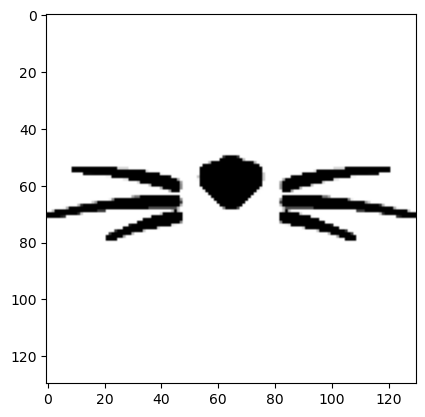


--- 2번째 얼굴 처리 중 ---
감지된 코 위치 (x,y) : (852,431)
스티커 크기 (w,h) : (130,130)
스티커 크기 조정 후: (130, 130, 4)
스티커 시작 (refined_x,refined_y) : (787,447)


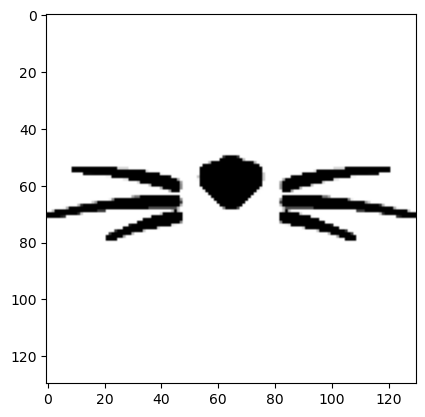

In [25]:
# --- 감지된 각 얼굴에 대해 스티커를 적용하는 메인 루프 ---
if len(dlib_rects) == 0:
    print("이미지에서 얼굴이 감지되지 않았습니다. 스티커를 붙일 수 없습니다.")
else:
    for i, dlib_rect in enumerate(dlib_rects): # 찾은 얼굴 영역의 좌표
        print(f"\n--- {i+1}번째 얼굴 처리 중 ---")
        l = dlib_rect.left() # 왼쪽
        t = dlib_rect.top() # 위쪽
        r = dlib_rect.right() # 오른쪽
        b = dlib_rect.bottom() # 아래쪽

        # 얼굴 영역에 사각형 그리기 (img_show에 표시)
        cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

        # 얼굴 영역 박스 마다 face landmark를 찾아냅니다
        # face landmark 좌표를 저장해둡니다
        points = landmark_predictor(img_rgb, dlib_rect)
        # 모든 landmark의 위치정보를 points 변수에 저장
        list_points = list(map(lambda p: (p.x, p.y), points.parts()))
        # 각각의 landmark 위치정보를 (x,y) 형태로 변환하여 list_points 리스트로 저장
        list_landmarks.append(list_points)
        # list_landmarks에 랜드마크 리스트를 저장

        # 랜드마크에 원 그리기 (img_show에 표시)
        for point in list_points:
            cv2.circle(img_show, point, 2, (0, 255, 255), -1)

        # --- 이 아래부터 스티커 적용 로직이 각 얼굴마다 실행됩니다 ---

        # 코의 index는 30 입니다 (dlib 68점 랜드마크 기준)
        nose_point = list_points[30]
        x_nose = nose_point[0] # 이미지에서 코 부위의 x값
        y_nose = nose_point[1] # 이미지에서 코 부위의 y값

        # 스티커 크기 설정 (얼굴 너비에 비례하게)
        face_width = dlib_rect.width() # 얼굴 영역의 가로 픽셀 수
        face_height = dlib_rect.height() # 얼굴 영역의 세로 픽셀 수
        sticker_w = face_width
        sticker_h = face_width # 예제와 동일하게 높이도 얼굴 너비와 같게 설정

        print(f'감지된 코 위치 (x,y) : ({x_nose},{y_nose})')
        print(f'스티커 크기 (w,h) : ({sticker_w},{sticker_h})')

        # 스티커 이미지 로드 (루프 안에서 매번 로드해도 되지만, 파일 I/O는 부하가 크므로, 스티커 이미지가 고정이라면 루프 밖에서 로드 후 resize하는게 더 효율적입니다.)
        # 여기서는 기존 코드 흐름을 위해 루프 안에 그대로 두겠습니다.
        sticker_path = os.path.join(home_dir, 'work/camera_sticker/images/cat-whiskers.png')
        temp_img_sticker = cv2.imread(sticker_path, cv2.IMREAD_UNCHANGED) # 알파 채널 포함 로드 (!!! 중요 !!!)
        if temp_img_sticker is None:
            print(f"Error: 스티커 이미지를 로드할 수 없습니다. 경로를 확인해주세요: {sticker_path}")
            continue # 스티커 로드 실패 시 현재 얼굴에 대한 처리를 건너뛰고 다음 얼굴로 넘어감
        
        # 스티커 이미지 크기 조정
        temp_img_sticker = cv2.resize(temp_img_sticker, (sticker_w, sticker_h))
        print(f"스티커 크기 조정 후: {temp_img_sticker.shape}")


        # 스티커의 시작 좌표 계산 (코 위치를 중심으로)
        # 예제 코드처럼 코 기준으로 스티커의 상단 중앙이 오도록 계산
        # 코 위치에 스티커의 중앙이 오도록 조정
        refined_x = x_nose - sticker_w // 2
        # y_nose - dlib_rect.height()//2 는 코보다 훨씬 위쪽을 가리킬 수 있으니 조정 필요.
        # 코 위치에서 스티커 높이의 절반만큼 위로 올리고, 추가적으로 얼굴 높이에 비례하여 조정 (예: 고양이 수염은 코 아래에 오는 것이 자연스러움)
        # 여기서는 예전 코드를 따라 (y - 스티커 높이의 절반)으로 계산하되, 스티커 위치를 좀 더 유연하게 조정할 수 있습니다.
        # 고양이 수염은 코 아래에 위치하는 것이 좋으므로, y_nose에서 약간 아래로 이동시켜줍니다.
        refined_y = y_nose + face_height // 8 # 코보다 약간 아래에 위치하도록 조정 (값 조정 가능)

        print(f'스티커 시작 (refined_x,refined_y) : ({refined_x},{refined_y})')

        # 스티커가 이미지 경계를 벗어나는 경우 처리 (좌표 및 스티커 이미지 자르기)
        sticker_offset_x = 0
        sticker_offset_y = 0

        # 왼쪽 경계 처리
        if refined_x < 0:
            sticker_offset_x = -refined_x
            refined_x = 0
        # 위쪽 경계 처리
        if refined_y < 0:
            sticker_offset_y = -refined_y
            refined_y = 0

        # 스티커 이미지도 잘린 부분에 맞춰 업데이트 (실제로 사용할 부분만 남김)
        current_sticker = temp_img_sticker[sticker_offset_y:, sticker_offset_x:].copy()
        # .copy()를 사용하여 원본 temp_img_sticker에 영향을 주지 않도록 합니다.

        plt.imshow(cv2.cvtColor(current_sticker, cv2.COLOR_BGR2RGB))
        plt.show()
        # 스티커가 이미지의 오른쪽/아래 경계를 벗어나는 경우 처리
        # 스티커를 붙일 영역의 실제 너비와 높이
        sticker_area_w = current_sticker.shape[1]
        sticker_area_h = current_sticker.shape[0]

        # 이미지 너비 초과
        if refined_x + sticker_area_w > img_show.shape[1]:
            current_sticker = current_sticker[:, :img_show.shape[1] - refined_x]
        # 이미지 높이 초과
        if refined_y + sticker_area_h > img_show.shape[0]:
            current_sticker = current_sticker[:img_show.shape[0] - refined_y, :]

        # 최종 스티커의 실제 적용 크기 업데이트
        sticker_area_w = current_sticker.shape[1]
        sticker_area_h = current_sticker.shape[0]
        if sticker_area_w <= 0 or sticker_area_h <= 0: # 스티커가 완전히 잘려서 사라진 경우
            print(f"경고: {i+1}번째 얼굴에 대한 스티커가 너무 작거나 완전히 잘렸습니다. 적용되지 않습니다.")
            continue # 다음 얼굴로 넘어감

        # 스티커를 적용할 img_show의 ROI (Region of Interest)
        # img_show (원본 이미지 복사본)에서 스티커가 붙을 영역을 가져옵니다.
        sticker_area_on_img = img_show[refined_y : refined_y + sticker_area_h,
                                       refined_x : refined_x + sticker_area_w]

        # 3. 알파 블렌딩 수행 (가장 중요한 부분: np.where 대신 투명도 처리)
        if current_sticker.shape[2] == 4: # 스티커가 4채널 (BGRA)인 경우
            sticker_bgr = current_sticker[:, :, 0:3] # 스티커의 색상 채널
            alpha_channel = current_sticker[:, :, 3] # 스티커의 알파 채널

            alpha_normalized = alpha_channel / 255.0 # 알파 채널을 0.0~1.0으로 정규화
            # alpha_normalized = np.stack([alpha_normalized, alpha_normalized, alpha_normalized], axis=-1)  안되서 수정
            alpha_normalized = alpha_channel.astype(np.float32) / 255.0 # 알파 채널을 0.0~1.0으로 정규화하며 float32로 변환
            # 3채널로 확장
            alpha_normalized = np.stack([alpha_normalized, alpha_normalized, alpha_normalized], axis=-1)
        
            # 전경(스티커)과 배경(원본 이미지 ROI) 혼합
            # (스티커 RGB * 알파) + (배경 ROI * (1 - 알파))
            # 이제 alpha_normalized와 sticker_bgr.astype(np.float32) 모두 float32 타입입니다.
            foreground = cv2.multiply(alpha_normalized, sticker_bgr.astype(np.float32))
            background = cv2.multiply(1.0 - alpha_normalized, sticker_area_on_img.astype(np.float32))
            blended_image = cv2.add(foreground, background).astype(np.uint8)

            # img_show에 블렌딩 결과 적용
            img_show[refined_y : refined_y + sticker_area_h,
                     refined_x : refined_x + sticker_area_w] = blended_image
        elif current_sticker.shape[2] == 3: # 스티커가 3채널 (BGR)인 경우 (투명도 없음)
            print(f"경고: {i+1}번째 얼굴에 적용할 스티커에 알파 채널이 없습니다. 배경을 투명하게 만들 수 없습니다. 단순 덮어쓰기.")
            img_show[refined_y : refined_y + sticker_area_h,
                     refined_x : refined_x + sticker_area_w] = current_sticker
        else:
            print(f"경고: {i+1}번째 얼굴에 대한 스티커 이미지 형식이 지원되지 않습니다 (3채널 또는 4채널만 지원).")


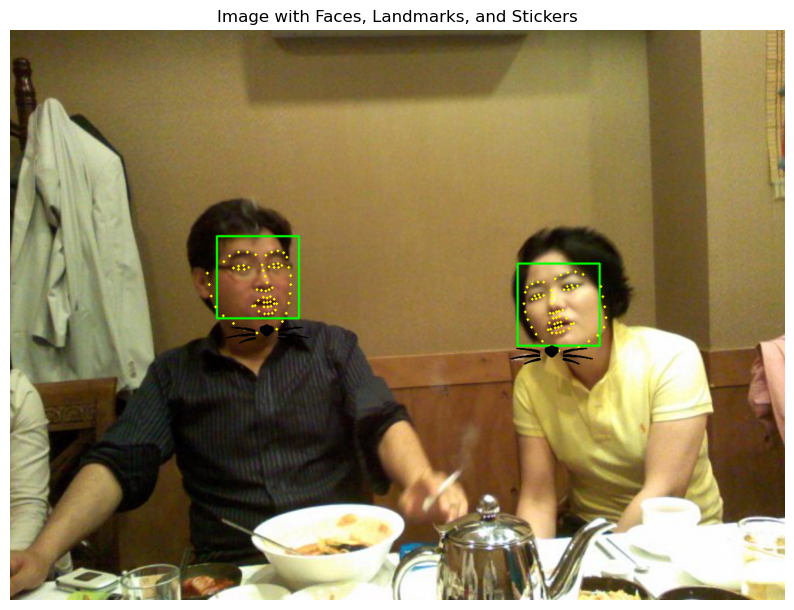

In [26]:
# --- 결과 이미지 표시 ---
# plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)) # 이 부분은 이제 필요 없습니다.
# plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
# plt.show()

# 감지된 얼굴과 랜드마크가 그려진 이미지 (디버깅용)
plt.figure(figsize=(10, 8)) # 이미지 크기 조정
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.title('Image with Faces, Landmarks, and Stickers')
plt.axis('off') # 축 정보 숨기기
plt.show()



In [28]:
# --- 감지된 각 얼굴에 대해 스티커를 적용하는 메인 루프 ---
if len(dlib_rects) == 0:
    print("이미지에서 얼굴이 감지되지 않았습니다. 스티커를 붙일 수 없습니다.")
else:
    for i, dlib_rect in enumerate(dlib_rects): # 찾은 얼굴 영역의 좌표
        print(f"\n--- {i+1}번째 얼굴 처리 중 ---")
        l = dlib_rect.left() # 왼쪽
        t = dlib_rect.top() # 위쪽
        r = dlib_rect.right() # 오른쪽
        b = dlib_rect.bottom() # 아래쪽

        # 얼굴 영역에 사각형 그리기 (img_show에 표시)
        cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

        # 얼굴 영역 박스 마다 face landmark를 찾아냅니다
        # face landmark 좌표를 저장해둡니다
        points = landmark_predictor(img_rgb, dlib_rect)
        # 모든 landmark의 위치정보를 points 변수에 저장
        list_points = list(map(lambda p: (p.x, p.y), points.parts()))
        # 각각의 landmark 위치정보를 (x,y) 형태로 변환하여 list_points 리스트로 저장
        list_landmarks.append(list_points)
        # list_landmarks에 랜드마크 리스트를 저장

        # 랜드마크에 원 그리기 (img_show에 표시)
        for point in list_points:
            cv2.circle(img_show, point, 2, (0, 255, 255), -1)

        # --- 이 아래부터 스티커 적용 로직이 각 얼굴마다 실행됩니다 ---

        # 코의 index는 30 입니다 (dlib 68점 랜드마크 기준)
        nose_point = list_points[30]
        x_nose = nose_point[0] # 이미지에서 코 부위의 x값
        y_nose = nose_point[1] # 이미지에서 코 부위의 y값

        # 스티커 크기 설정 (얼굴 너비에 비례하게)
        face_width = dlib_rect.width() # 얼굴 영역의 가로 픽셀 수
        face_height = dlib_rect.height() # 얼굴 영역의 세로 픽셀 수
        sticker_w = face_width
        sticker_h = face_width # 예제와 동일하게 높이도 얼굴 너비와 같게 설정

        print(f'감지된 코 위치 (x,y) : ({x_nose},{y_nose})')
        print(f'스티커 크기 (w,h) : ({sticker_w},{sticker_h})')

        # 스티커 이미지 로드 (루프 안에서 매번 로드해도 되지만, 파일 I/O는 부하가 크므로, 스티커 이미지가 고정이라면 루프 밖에서 로드 후 resize하는게 더 효율적입니다.)
        # 여기서는 기존 코드 흐름을 위해 루프 안에 그대로 두겠습니다.
        sticker_path = os.path.join(home_dir, 'work/camera_sticker/images/cat-whiskers.png')
        temp_img_sticker = cv2.imread(sticker_path, cv2.IMREAD_UNCHANGED) # 알파 채널 포함 로드 (!!! 중요 !!!)
        if temp_img_sticker is None:
            print(f"Error: 스티커 이미지를 로드할 수 없습니다. 경로를 확인해주세요: {sticker_path}")
            continue # 스티커 로드 실패 시 현재 얼굴에 대한 처리를 건너뛰고 다음 얼굴로 넘어감
        
        # 스티커 이미지 크기 조정
        temp_img_sticker = cv2.resize(temp_img_sticker, (sticker_w, sticker_h))
        print(f"스티커 크기 조정 후: {temp_img_sticker.shape}")


        # 스티커의 시작 좌표 계산 (코 위치를 중심으로)
        # 예제 코드처럼 코 기준으로 스티커의 상단 중앙이 오도록 계산
        # 코 위치에 스티커의 중앙이 오도록 조정
        refined_x = x_nose - sticker_w // 2
        # y_nose - dlib_rect.height()//2 는 코보다 훨씬 위쪽을 가리킬 수 있으니 조정 필요.
        # 코 위치에서 스티커 높이의 절반만큼 위로 올리고, 추가적으로 얼굴 높이에 비례하여 조정 (예: 고양이 수염은 코 아래에 오는 것이 자연스러움)
        # 여기서는 예전 코드를 따라 (y - 스티커 높이의 절반)으로 계산하되, 스티커 위치를 좀 더 유연하게 조정할 수 있습니다.
        # 고양이 수염은 코 아래에 위치하는 것이 좋으므로, y_nose에서 약간 아래로 이동시켜줍니다.
        refined_y = y_nose + face_height // 8 # 코보다 약간 아래에 위치하도록 조정 (값 조정 가능)

        print(f'스티커 시작 (refined_x,refined_y) : ({refined_x},{refined_y})')

        # 스티커가 이미지 경계를 벗어나는 경우 처리 (좌표 및 스티커 이미지 자르기)
        sticker_offset_x = 0
        sticker_offset_y = 0

        # 왼쪽 경계 처리
        if refined_x < 0:
            sticker_offset_x = -refined_x
            refined_x = 0
        # 위쪽 경계 처리
        if refined_y < 0:
            sticker_offset_y = -refined_y
            refined_y = 0

        # 스티커 이미지도 잘린 부분에 맞춰 업데이트 (실제로 사용할 부분만 남김)
        current_sticker = temp_img_sticker[sticker_offset_y:, sticker_offset_x:].copy()
        # .copy()를 사용하여 원본 temp_img_sticker에 영향을 주지 않도록 합니다.


        # 스티커가 이미지의 오른쪽/아래 경계를 벗어나는 경우 처리
        # 스티커를 붙일 영역의 실제 너비와 높이
        sticker_area_w = current_sticker.shape[1]
        sticker_area_h = current_sticker.shape[0]

        # 이미지 너비 초과
        if refined_x + sticker_area_w > img_show.shape[1]:
            current_sticker = current_sticker[:, :img_show.shape[1] - refined_x]
        # 이미지 높이 초과
        if refined_y + sticker_area_h > img_show.shape[0]:
            current_sticker = current_sticker[:img_show.shape[0] - refined_y, :]

        # 최종 스티커의 실제 적용 크기 업데이트
        sticker_area_w = current_sticker.shape[1]
        sticker_area_h = current_sticker.shape[0]
        if sticker_area_w <= 0 or sticker_area_h <= 0: # 스티커가 완전히 잘려서 사라진 경우
            print(f"경고: {i+1}번째 얼굴에 대한 스티커가 너무 작거나 완전히 잘렸습니다. 적용되지 않습니다.")
            continue # 다음 얼굴로 넘어감

        # 스티커를 적용할 img_show의 ROI (Region of Interest)
        # img_show (원본 이미지 복사본)에서 스티커가 붙을 영역을 가져옵니다.
        sticker_area_on_img = img_show[refined_y : refined_y + sticker_area_h,
                                       refined_x : refined_x + sticker_area_w]

        # 3. 알파 블렌딩 수행 (가장 중요한 부분: np.where 대신 투명도 처리)
        if current_sticker.shape[2] == 4: # 스티커가 4채널 (BGRA)인 경우
            sticker_bgr = current_sticker[:, :, 0:3] # 스티커의 색상 채널
            alpha_channel = current_sticker[:, :, 3] # 스티커의 알파 채널

            alpha_normalized = alpha_channel / 255.0 # 알파 채널을 0.0~1.0으로 정규화
            # alpha_normalized = np.stack([alpha_normalized, alpha_normalized, alpha_normalized], axis=-1)  안되서 수정
            alpha_normalized = alpha_channel.astype(np.float32) / 255.0 # 알파 채널을 0.0~1.0으로 정규화하며 float32로 변환
            # 3채널로 확장
            alpha_normalized = np.stack([alpha_normalized, alpha_normalized, alpha_normalized], axis=-1)
        
            # 전경(스티커)과 배경(원본 이미지 ROI) 혼합
            # (스티커 RGB * 알파) + (배경 ROI * (1 - 알파))
            # 이제 alpha_normalized와 sticker_bgr.astype(np.float32) 모두 float32 타입입니다.
            foreground = cv2.multiply(alpha_normalized, sticker_bgr.astype(np.float32))
            background = cv2.multiply(1.0 - alpha_normalized, sticker_area_on_img.astype(np.float32))
            blended_image = cv2.add(foreground, background).astype(np.uint8)

            # img_show에 블렌딩 결과 적용
            img_show[refined_y : refined_y + sticker_area_h,
                     refined_x : refined_x + sticker_area_w] = blended_image
        elif current_sticker.shape[2] == 3: # 스티커가 3채널 (BGR)인 경우 (투명도 없음)
            print(f"경고: {i+1}번째 얼굴에 적용할 스티커에 알파 채널이 없습니다. 배경을 투명하게 만들 수 없습니다. 단순 덮어쓰기.")
            img_show[refined_y : refined_y + sticker_area_h,
                     refined_x : refined_x + sticker_area_w] = current_sticker
        else:
            print(f"경고: {i+1}번째 얼굴에 대한 스티커 이미지 형식이 지원되지 않습니다 (3채널 또는 4채널만 지원).")



--- 1번째 얼굴 처리 중 ---
감지된 코 위치 (x,y) : (404,398)
스티커 크기 (w,h) : (130,130)
스티커 크기 조정 후: (130, 130, 4)
스티커 시작 (refined_x,refined_y) : (339,414)

--- 2번째 얼굴 처리 중 ---
감지된 코 위치 (x,y) : (852,431)
스티커 크기 (w,h) : (130,130)
스티커 크기 조정 후: (130, 130, 4)
스티커 시작 (refined_x,refined_y) : (787,447)


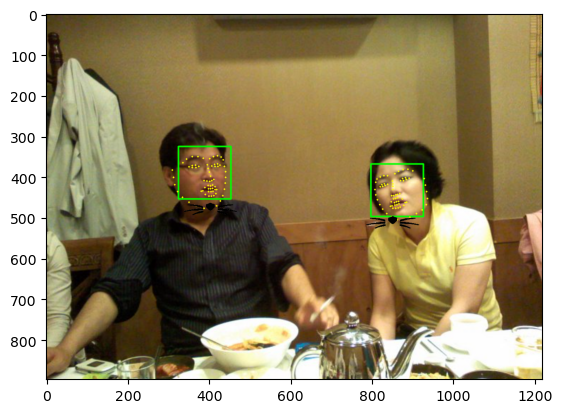

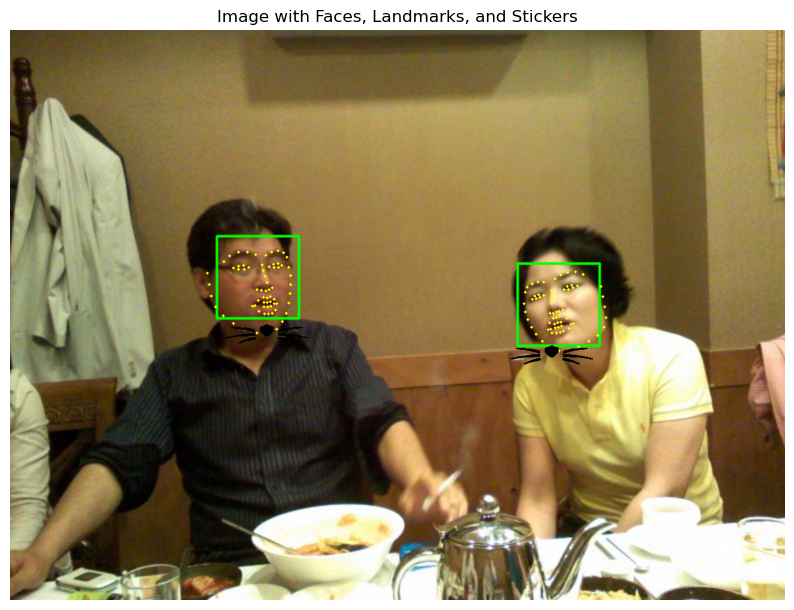

In [30]:
# --- 결과 이미지 표시 ---
# 감지된 얼굴과 랜드마크가 그려진 이미지 (디버깅용)
plt.figure(figsize=(10, 8)) # 이미지 크기 조정
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.title('Image with Faces, Landmarks, and Stickers')w
plt.axis('off') # 축 정보 숨기기
plt.show()
